In [ ]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:10<00:00, 171MB/s]
100% 1.06G/1.06G [00:10<00:00, 113MB/s]


In [ ]:
#unzipping the contents of the downloaded data
!unzip /content/dogs-vs-cats.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/dogs/dog.4419.jpg  
  inflating: /content/train/dogs/dog.442.jpg  
  inflating: /content/train/dogs/dog.4420.jpg  
  inflating: /content/train/dogs/dog.4421.jpg  
  inflating: /content/train/dogs/dog.4422.jpg  
  inflating: /content/train/dogs/dog.4424.jpg  
  inflating: /content/train/dogs/dog.4425.jpg  
  inflating: /content/train/dogs/dog.4426.jpg  
  inflating: /content/train/dogs/dog.4427.jpg  
  inflating: /content/train/dogs/dog.4431.jpg  
  inflating: /content/train/dogs/dog.4433.jpg  
  inflating: /content/train/dogs/dog.4436.jpg  
  inflating: /content/train/dogs/dog.4438.jpg  
  inflating: /content/train/dogs/dog.4439.jpg  
  inflating: /content/train/dogs/dog.444.jpg  
  inflating: /content/train/dogs/dog.4440.jpg  
  inflating: /content/train/dogs/dog.4441.jpg  
  inflating: /content/train/dogs/dog.4442.jpg  
  inflating: /content/train/dogs/dog.4443.jpg  
  inflating: /content/train/dogs/dog.44

In [ ]:
!pip3 install tensorflow numpy matplotlib keras

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import tensorflow as tf
from tensorflow.keras  import layers , models
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model
from tensorflow.keras.preprocessing.image import load_img
from sklearn.metrics import confusion_matrix , classification_report , roc_curve , auc
import seaborn as sns
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
list_cats = ['/content/dogs_vs_cats/train/cats/cat.0.jpg' , '/content/dogs_vs_cats/train/cats/cat.1.jpg']
#as we cat list all the directories one by one we use os walk and os.listdir

In [ ]:
os.listdir('/content/dogs_vs_cats/train/dogs')

['dog.11119.jpg',
 'dog.779.jpg',
 'dog.7997.jpg',
 'dog.3892.jpg',
 'dog.2326.jpg',
 'dog.7257.jpg',
 'dog.842.jpg',
 'dog.5453.jpg',
 'dog.8368.jpg',
 'dog.10114.jpg',
 'dog.11536.jpg',
 'dog.11074.jpg',
 'dog.5448.jpg',
 'dog.9292.jpg',
 'dog.1988.jpg',
 'dog.178.jpg',
 'dog.3423.jpg',
 'dog.6745.jpg',
 'dog.482.jpg',
 'dog.1852.jpg',
 'dog.967.jpg',
 'dog.9563.jpg',
 'dog.7304.jpg',
 'dog.687.jpg',
 'dog.8462.jpg',
 'dog.10976.jpg',
 'dog.3938.jpg',
 'dog.10586.jpg',
 'dog.2755.jpg',
 'dog.5860.jpg',
 'dog.10079.jpg',
 'dog.7232.jpg',
 'dog.6329.jpg',
 'dog.10741.jpg',
 'dog.3136.jpg',
 'dog.9765.jpg',
 'dog.11958.jpg',
 'dog.6469.jpg',
 'dog.418.jpg',
 'dog.11467.jpg',
 'dog.7465.jpg',
 'dog.2557.jpg',
 'dog.2879.jpg',
 'dog.1760.jpg',
 'dog.3252.jpg',
 'dog.1378.jpg',
 'dog.4158.jpg',
 'dog.3407.jpg',
 'dog.8500.jpg',
 'dog.4456.jpg',
 'dog.10612.jpg',
 'dog.1216.jpg',
 'dog.10660.jpg',
 'dog.7495.jpg',
 'dog.3052.jpg',
 'dog.10179.jpg',
 'dog.861.jpg',
 'dog.11809.jpg',
 'dog.11

In [ ]:
dog_path_dir = '/content/dogs_vs_cats/train/dogs'
#taking random sample to check the flow

In [ ]:
# defining the funtion for randomly genrating the data from the directory
def plot_image_from_dir(directory_path , class_animal , num_images = 9):
  image_filename = os.listdir(directory_path)
  if(len(image_filename) < num_images):
    print(f"found only {len(image_filename)} in the directory and printing them all")
    num_images = len(image_filename)
  selected_image = random.sample(image_filename  , num_images)

  fig , axes = plt.subplots(3 ,3 ,figsize= (8 ,8))
  axes = axes.ravel()

  for i , image in enumerate(selected_image):
    image_path = os.path.join(directory_path, image)
    image = Image.open(image_path)
    axes[i].imshow(image )
    axes[i].set_title(f"{class_animal}")
    axes[i].axis('off')
  plt.tight_layout()
  plt.show()

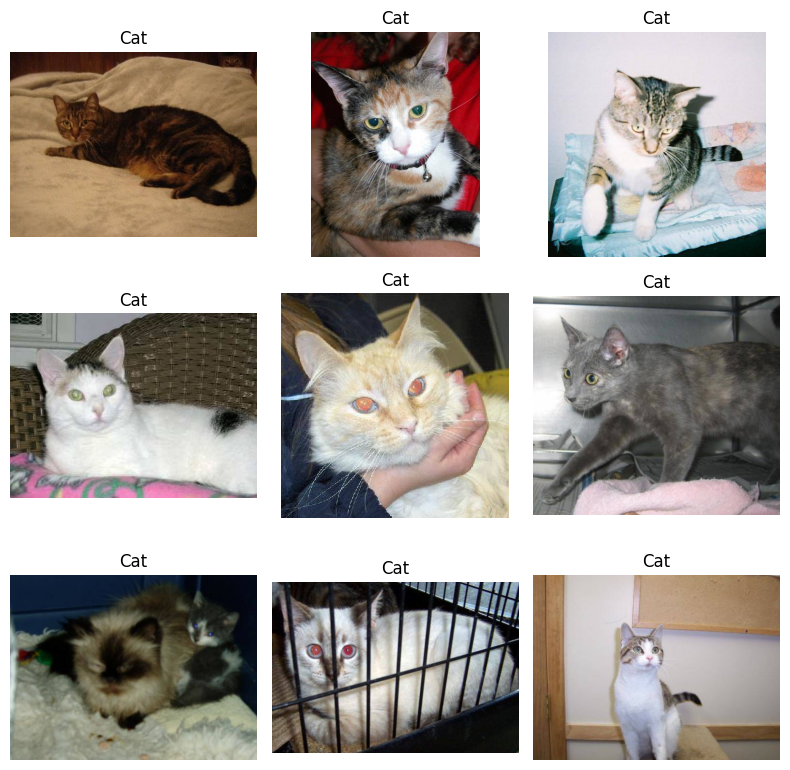

In [ ]:
cat_path_dir = '/content/train/cats'
plot_image_from_dir(cat_path_dir , class_animal = 'Cat')

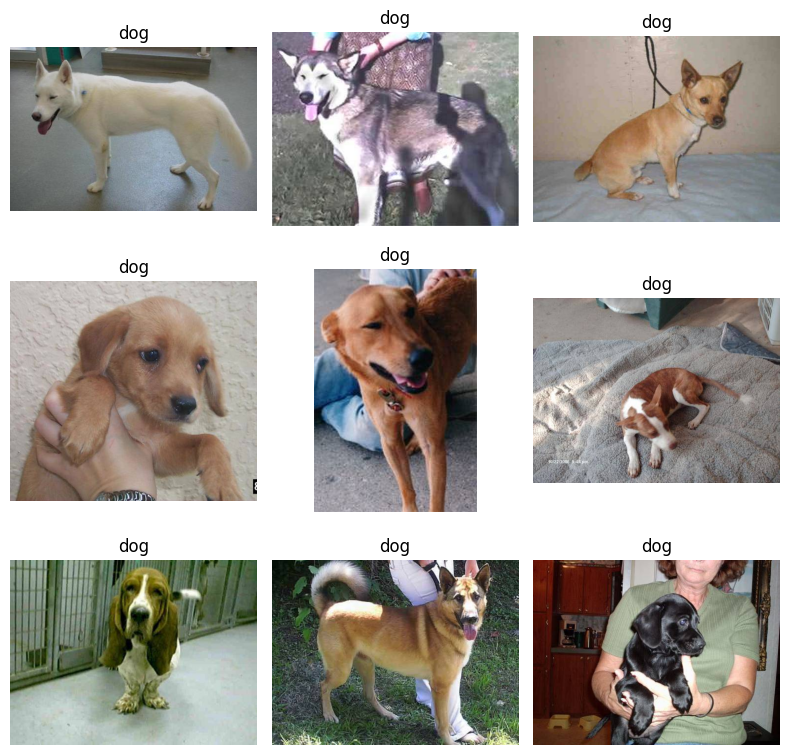

In [ ]:
plot_image_from_dir(dog_path_dir , class_animal = 'dog')

In [ ]:
cat_images = os.listdir(cat_path_dir)
dog_images = os.listdir(dog_path_dir)
count = [len(cat_images) , len(dog_images)]
print(count)

[10000, 10000]


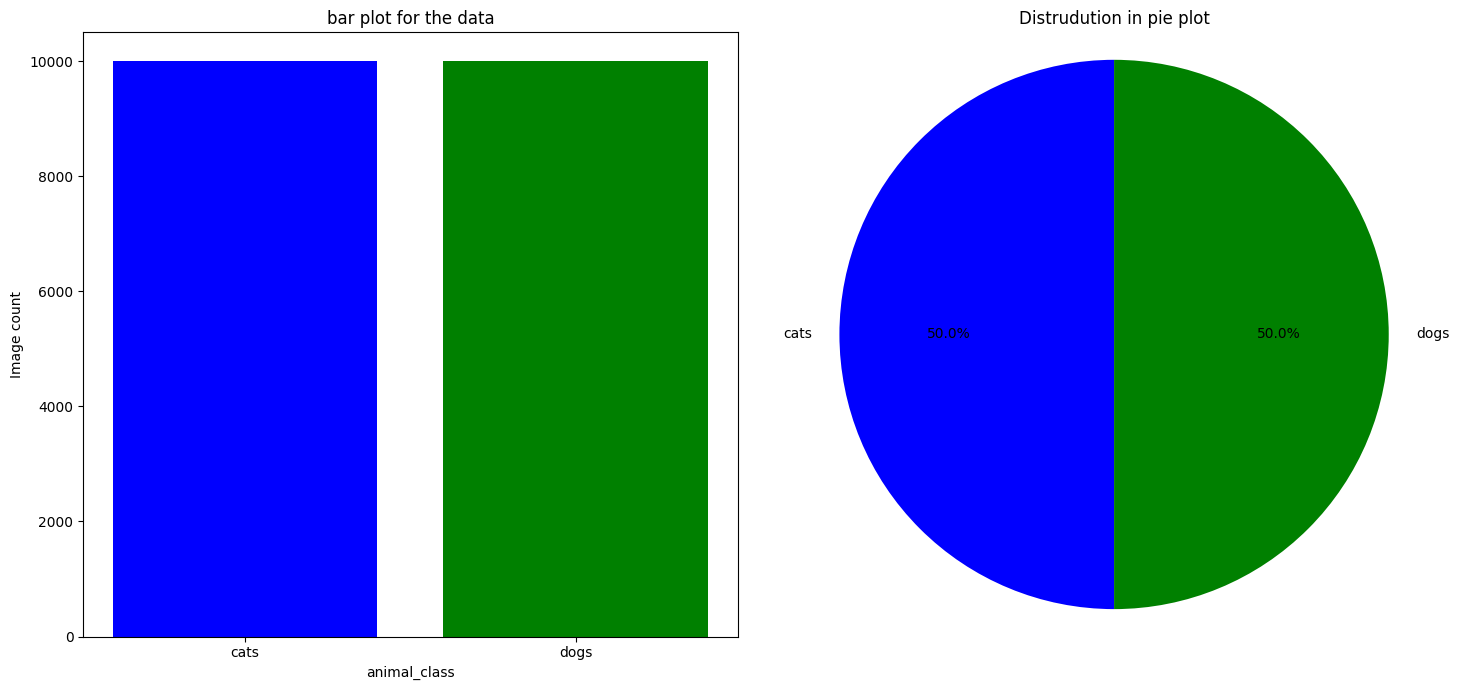

In [ ]:
# creating a plot for data ananlysis
class_animals = ['cats' , 'dogs']
fig , ax = plt.subplots(1 , 2 , figsize= (15 ,7))
ax[0].bar(class_animals , count , color = ['blue' , 'green'])
ax[0].set_xlabel('animal_class')
ax[0].set_ylabel('Image count')
ax[0].set_title('bar plot for the data')

ax[1].pie( count ,labels = class_animals ,  colors = ['blue', 'green']  , autopct = '%1.1f%%' , startangle = 90)
ax[1].set_title('Distrudution in pie plot')
ax[1].axis('equal')

plt.tight_layout()
plt.show()

In [ ]:
# removing corrupted images as keeping only those images that have jpeg jpg or png as format
import cv2
import imghdr

image_exts = ['jpeg' , 'jpg' , 'png']
data_dir = '/content/dogs_vs_cats'

for root , dirs , files in os.walk(data_dir):
  for file in files:
    file_path = os.path.join(root , file)
    try:
      file_type = imghdr.what(file_path)
      if file_path not in image_exts:
        print(file_path)
        os.remove(file_path)
      else:
        img = cv2.imread(file_path)
    except Exception as e :
      print(file_path , e)
      os.remove(file_path)

Streaming output truncated to the last 5000 lines.
/content/dogs_vs_cats/test/dogs/dog.2284.jpg
/content/dogs_vs_cats/test/dogs/dog.2339.jpg
/content/dogs_vs_cats/test/dogs/dog.3619.jpg
/content/dogs_vs_cats/test/dogs/dog.1840.jpg
/content/dogs_vs_cats/test/dogs/dog.8638.jpg
/content/dogs_vs_cats/test/dogs/dog.10477.jpg
/content/dogs_vs_cats/test/dogs/dog.176.jpg
/content/dogs_vs_cats/test/dogs/dog.2784.jpg
/content/dogs_vs_cats/test/dogs/dog.5405.jpg
/content/dogs_vs_cats/test/dogs/dog.6001.jpg
/content/dogs_vs_cats/test/dogs/dog.871.jpg
/content/dogs_vs_cats/test/dogs/dog.2930.jpg
/content/dogs_vs_cats/test/dogs/dog.8611.jpg
/content/dogs_vs_cats/test/dogs/dog.5377.jpg
/content/dogs_vs_cats/test/dogs/dog.7141.jpg
/content/dogs_vs_cats/test/dogs/dog.6850.jpg
/content/dogs_vs_cats/test/dogs/dog.775.jpg
/content/dogs_vs_cats/test/dogs/dog.4125.jpg
/content/dogs_vs_cats/test/dogs/dog.6578.jpg
/content/dogs_vs_cats/test/dogs/dog.3408.jpg
/content/dogs_vs_cats/test/dogs/dog.2846.jpg
/conte

In [ ]:
# using numpy and PIL Images to load the shape and channels
def image_to_arr(image_path):
  try:
    with Image.open(image_path) as img :
      image_array = np.array(img)
      return image_array
  except IOError :
    print(f"could not read the path of the image {image_path}")
    return None

array([[[  9,   8,   4],
        [ 10,  11,   6],
        [ 13,  13,  11],
        ...,
        [160, 162, 183],
        [159, 161, 184],
        [158, 160, 183]],

       [[ 17,  13,  10],
        [ 16,  15,  11],
        [ 17,  17,  15],
        ...,
        [157, 159, 180],
        [156, 158, 181],
        [155, 157, 180]],

       [[ 17,  12,   8],
        [ 17,  13,  10],
        [ 17,  16,  14],
        ...,
        [155, 157, 178],
        [154, 156, 179],
        [153, 155, 178]],

       ...,

       [[110,  95,  88],
        [111,  96,  89],
        [112,  97,  90],
        ...,
        [128, 111, 101],
        [128, 112,  99],
        [128, 112,  99]],

       [[110,  95,  88],
        [109,  94,  87],
        [110,  95,  88],
        ...,
        [129, 112, 102],
        [129, 113, 100],
        [129, 113, 100]],

       [[113,  98,  91],
        [110,  95,  88],
        [109,  94,  87],
        ...,
        [125, 108,  98],
        [125, 109,  96],
        [125, 109,  96]]], dtype=uint8)
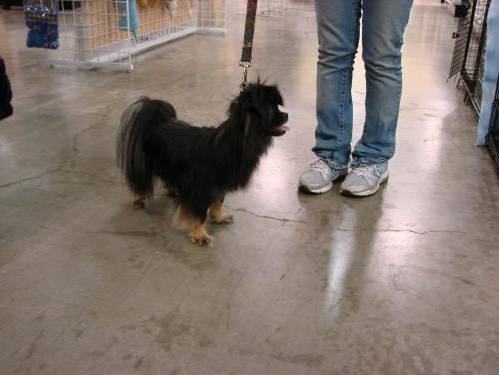

In [ ]:
image_to_arr('/content/train/dogs/dog.1000.jpg')
# checking if the funtion is working

In [ ]:
def img_to_array2(image):
   img = cv2.imread(image)
   if img is not None:
    print(img)
    print(imag.shape)
   else:
    print("cant be laoded plese check for the permission")

In [ ]:
# loading the image with pil and printing it with np.array
def img_to_array3(image):
  img_pil = Image.open(image)
  ima_arr = np.array(img_pil)
  print(ima_arr)
  print(ima_arr.shape )


In [ ]:
base_dir = '/content/train'
train_datagen = ImageDataGenerator(rescale = 1./255 , validation_split = 0.2 )

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir ,
    target_size = (150 , 150 ),
    batch_size = 20,
    class_mode = 'binary' ,
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir ,
    target_size = (150 , 150),
    batch_size = 20 ,
    class_mode = "binary" ,
    subset = 'validation'
)


Found 16000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [ ]:
train_class_labels = train_generator.class_indices
validation_class_labels = validation_generator.class_indices
print(train_class_labels)
print(validation_class_labels)

{'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1}


In [ ]:
image , labels = next(train_generator)
image , labels

(array([[[[0.81568635, 0.12156864, 0.4784314 ],
          [0.882353  , 0.09019608, 0.4901961 ],
          [0.79215693, 0.10980393, 0.49411768],
          ...,
          [0.8078432 , 0.10588236, 0.5137255 ],
          [0.8588236 , 0.08235294, 0.5254902 ],
          [0.8588236 , 0.08235294, 0.5254902 ]],
 
         [[0.85098046, 0.08235294, 0.5058824 ],
          [0.91372555, 0.03921569, 0.5058824 ],
          [0.82745105, 0.09411766, 0.5137255 ],
          ...,
          [0.8470589 , 0.10196079, 0.53333336],
          [0.8705883 , 0.07450981, 0.53333336],
          [0.8588236 , 0.08235294, 0.5254902 ]],
 
         [[0.91372555, 0.05490196, 0.54901963],
          [0.9725491 , 0.02745098, 0.5372549 ],
          [0.8431373 , 0.10980393, 0.52156866],
          ...,
          [0.8235295 , 0.09803922, 0.49803925],
          [0.882353  , 0.07058824, 0.5254902 ],
          [0.8588236 , 0.08235294, 0.5254902 ]],
 
         ...,
 
         [[0.882353  , 0.06666667, 0.54509807],
          [0.89411

In [ ]:
import matplotlib.pyplot as plt

def plot_images_from_generator(generator, num_images=4):
    images, labels = next(generator)

    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))
    axes = axes.flatten()

    # Plot each image with its corresponding label
    for img, label, ax in zip(images, labels, axes):
        ax.imshow(img.astype('uint8'))  # Ensure the image is in the correct format
        class_labels = dict((v, k) for k, v in generator.class_indices.items())
        ax.set_title(class_labels[int(label)])
        ax.axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
train_generator.reset()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

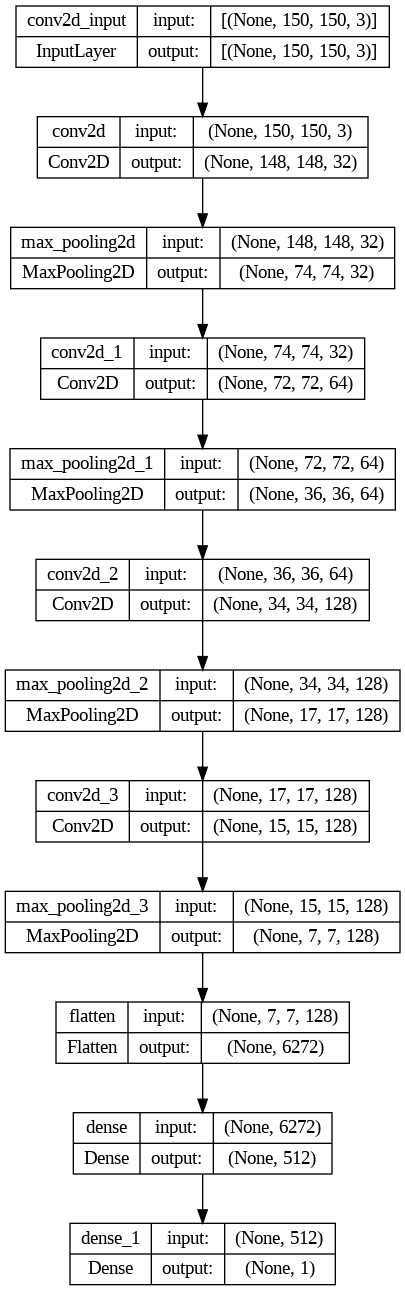

In [ ]:
plot_model(model , to_file = 'architcucture.png',
           show_shapes = True , show_layer_names = True)

In [ ]:
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])

In [ ]:
import numpy as np

batch = 20
train_steps = int(np.ceil(train_generator.samples / batch))
validation_steps = int(np.ceil(validation_generator.samples / batch))
print(train_steps, validation_steps)


800.0 200.0


In [ ]:
history = model.fit(train_generator , steps_per_epoch = train_steps , epochs = 10 , validation_data = validation_generator , validation_steps = validation_steps )

Epoch 1/10
800/800 [==============================] - 49s 44ms/step - loss: 0.6862 - accuracy: 0.5443 - val_loss: 0.6645 - val_accuracy: 0.5850
Epoch 2/10
800/800 [==============================] - 39s 49ms/step - loss: 0.6358 - accuracy: 0.6332 - val_loss: 0.5390 - val_accuracy: 0.7365
Epoch 3/10
800/800 [==============================] - 34s 43ms/step - loss: 0.5248 - accuracy: 0.7422 - val_loss: 0.4541 - val_accuracy: 0.7820
Epoch 4/10
800/800 [==============================] - 36s 44ms/step - loss: 0.4303 - accuracy: 0.7993 - val_loss: 0.4282 - val_accuracy: 0.8033
Epoch 5/10
800/800 [==============================] - 36s 45ms/step - loss: 0.3697 - accuracy: 0.8362 - val_loss: 0.3993 - val_accuracy: 0.8158
Epoch 6/10
800/800 [==============================] - 39s 48ms/step - loss: 0.3038 - accuracy: 0.8676 - val_loss: 0.3566 - val_accuracy: 0.8403
Epoch 7/10
800/800 [==============================] - 35s 44ms/step - loss: 0.2414 - accuracy: 0.8994 - val_loss: 0.3899 - val_accuracy:

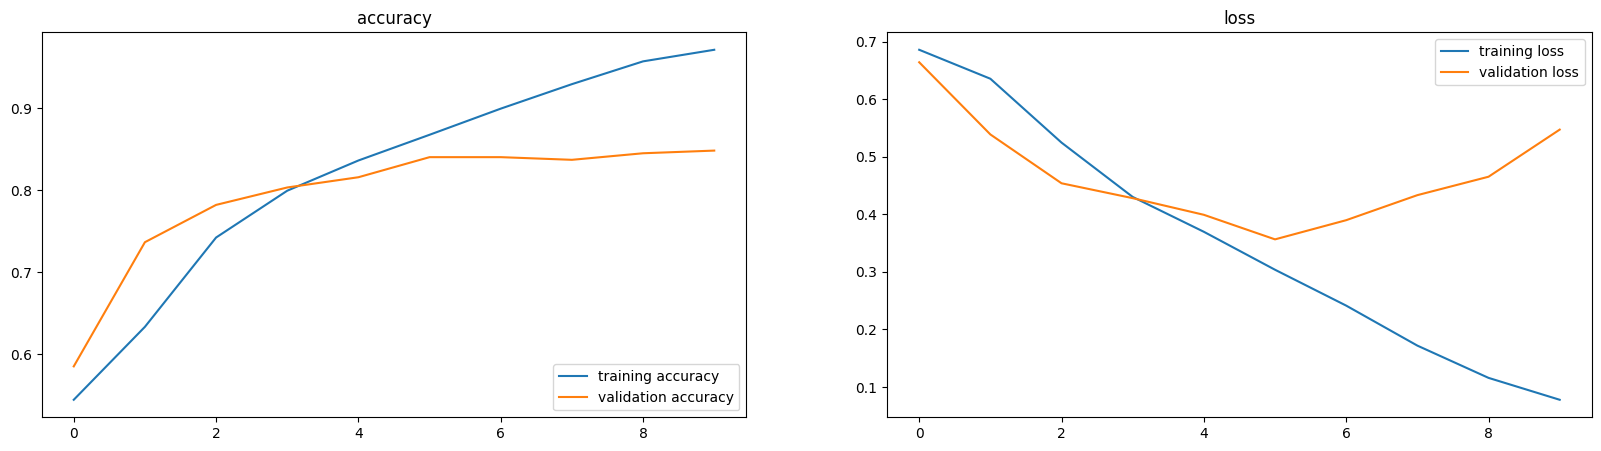

In [ ]:
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize = (20 ,5))
plt.subplot(1 ,2, 1)
plt.plot(epochs_range , acc , label = 'training accuracy')
plt.plot(epochs_range , val_acc , label = 'validation accuracy')
plt.legend(loc = 'lower right')
plt.title('accuracy')

plt.subplot(1 , 2 , 2)
plt.plot(epochs_range , loss , label = 'training loss')
plt.plot(epochs_range , val_loss , label = 'validation loss')
plt.legend(loc ='upper right')
plt.title('loss')
plt.show()

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_dir = '/content/test'
test_generator = test_datagen.flow_from_directory(
    test_dir ,
    target_size = (150 , 150 ),
    batch_size = 20 ,
    class_mode = 'binary' ,
    shuffle = False
)

Found 5000 images belonging to 2 classes.


In [ ]:
step = int(np.ceil(test_generator.samples/test_generator.batch_size))

In [ ]:
probabilities = model.predict(test_generator , steps = step )
probabilities

250/250 [==============================] - 8s 30ms/step


array([[4.3028888e-01],
       [1.3045060e-07],
       [3.0194897e-05],
       ...,
       [3.2527381e-01],
       [1.6860887e-01],
       [8.7069279e-01]], dtype=float32)

In [ ]:
test_generator.reset()
true_classes = test_generator.classes
step = int(np.ceil(test_generator.samples/test_generator.batch_size))
probabilities = model.predict(test_generator , steps = step )
predicted_classes = (probabilities > 0.5).astype(int).squeeze()
class_labels = list(test_generator.class_indices.keys())
predicted_classes

250/250 [==============================] - 10s 39ms/step


array([0, 0, 0, ..., 0, 0, 1])

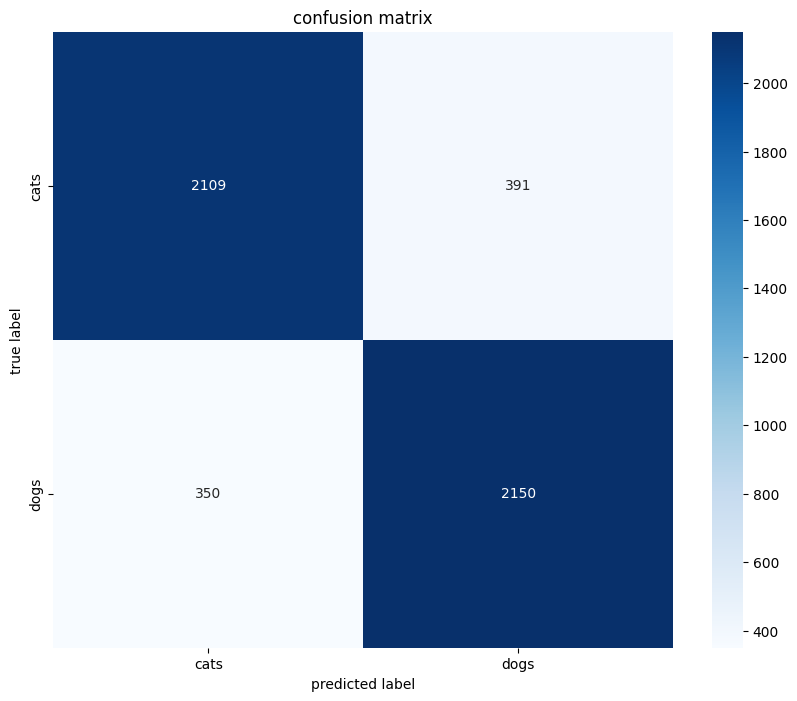

In [ ]:
cm = confusion_matrix(true_classes , predicted_classes )

plt.figure(figsize =(10 ,8 ))
sns.heatmap(cm , annot = True , fmt = "d" , cmap = 'Blues' , xticklabels = class_labels , yticklabels = class_labels)
plt.title('confusion matrix')
plt.ylabel('true label')
plt.xlabel('predicted label')
plt.show()

In [ ]:
loss , accuracy = model.evaluate(test_generator)
print(loss , accuracy)

250/250 [==============================] - 8s 32ms/step - loss: 0.5466 - accuracy: 0.8518
0.5465799570083618 0.8518000245094299


In [ ]:
def make_prediction(img_path):
  img = load_img(img_path , target_size = (150 , 150 ))
  img_array = img_to_arr(img)
  img_array = np.expand_dims(img_array , axis = 0)
  img_array /= 255.

  prediction = model.predict(img_array)
  print(prediction)

  plt.subplot(1 ,2 ,1)
  plt.imshow(img)
  plt.title('original Image')
  plt.axis('off')

  plt.subplot(1 ,2 ,2)
  if(prediction[0][0] > 0.5) :
    plt.title('predicted: Dog')
  else:
    plt.title('Predicted: cat')
  plt.imshow(img)
  plt.axis('off')
  plt.show()

In [ ]:
# misclassification
test_generator.reset()
prediction = model.predict(test_generator , verbose = 1 )

predicted_classes = (prediction > 0.5).astype(int).reshape(-1 )
true_classes  = test_generator.classes
misclassified_indices = np.where(predicted_classes != true_classes)[0]
misclassified_counts = len(misclassified_indices)
print( misclassified_counts  , misclassified_indices)

250/250 [==============================] - 9s 34ms/step
741 [  21   25   31   37   41   42   55   61   71   75   76   78   93  104
  111  113  118  124  129  130  134  137  143  151  155  156  161  167
  179  202  209  224  232  234  237  245  248  250  258  262  268  274
  283  285  289  296  306  309  318  321  327  328  336  339  341  346
  360  362  373  378  386  397  398  404  408  416  431  432  437  438
  441  443  444  451  453  462  464  466  474  478  480  486  508  510
  512  522  524  529  534  541  544  550  554  562  574  577  582  583
  593  598  611  614  615  619  636  644  670  672  673  683  684  692
  693  696  698  702  712  720  722  733  739  753  765  766  775  776
  777  787  792  796  802  812  814  820  821  825  828  831  843  844
  846  850  855  856  860  863  870  875  882  888  890  891  900  902
  910  911  914  919  920  928  933  959  960  961  964  966  971  973
  977  986  991  995 1030 1034 1037 1038 1056 1062 1065 1082 1087 1091
 1093 1094 1107 1

250/250 [==============================] - 9s 38ms/step
741


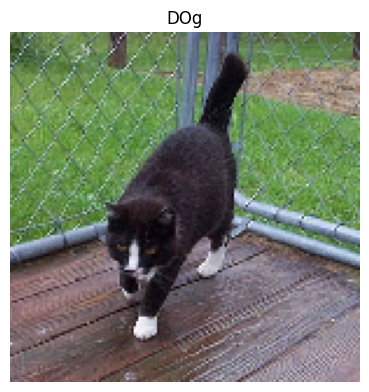

In [ ]:
predictions= model.predict(test_generator)
predicted_classes = prediction > 0.5
true_classes = test_generator.classes
filenames = test_generator.filenames
misclassified_indices = np.where(predicted_classes.flatten() != true_classes)[0]

print(len(misclassified_indices))

num_sample_dis = 4
random_indices = random.sample(list(misclassified_indices) , num_sample_dis)

plt.figure(figsize = (10 , 10))
for i , index in enumerate(random_indices ,1):
  img_path = test_dir +'/' + filenames[index]
  img = load_img(img_path , target_size = (150 , 150))
  predicted_class = "DOg" if predicted_classes[index] else "Cat"

  plt.subplot(2 ,2 , 1)
  plt.imshow(img)
  plt.title(predicted_class)
  plt.axis("off")
plt.show()
